# *Lecture 18*

# Physical Waves in 1 and 2 Dimensions

| |
|:---:|
|Selected content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|

## Follow-up on Stability Condition for 1-D Waves

During the previous lecture, we discussed the stability conditions for numerical solutions to the 1-D wave equation:

$$\frac{\partial^2 y(x,t)}{\partial x^2} = \frac{\rho}{T} \frac{\partial^2 y(x,t)}{\partial t^2}$$

We introduced a *growth factor*, based on the von Neumann stability analysis:

$$\begin{align}
u(x, h_t) &= e^{ikx} + C\frac{h_t}{h_x} \left[ e^{ik(x+h_x)} - e^{ikx} \right] \\
&= \left[ 1 + C\frac{h_t}{h_x}\left( e^{ikh_x} - 1 \right) \right] e^{ikx} \\
&= G(k) e^{ikx} \\
&= G(k) u_0(x) \\
\end{align}$$

The argument was that the *growth factor* or *amplification factor* must be less than 1 so that the numerical solution does not blow up:

$$\begin{align}
|G| & \leq 1 \\
\left| 1-2 C \frac{h_t}{h_x} \right| & \leq 1 \\
-1 + 2C \frac{h_t}{h_x} & \leq 1 \\
C\frac{h_t}{h_x} & \leq 1
\end{align}$$

But we did not see the gradual growth ("blow-up") of the solution for $G>1$.  We just saw an out-of-control solution from the very start.

**The problem** was that the blow-up happened too quickly for us to see.
One possibility is that the initial condition involving two triangular pulses did not have well-defined second derivatives.
(We can always calculate the mid-point algorithm approximation to the second derivative over some interval, even if the second derivative at a point in the interval does not exist!)

Investigate a few things related to the stability condition:
* Fine-tune $h_x/h_t$ to see the uncontrolled growth for the triangular spikes
* Switch to a more "friendly" initial condition: $u_0 (x) = \sin(x)$, and check behavior on both sides of the stability limit
* Switch to a more complex initial condition: $u_0 (x) = A \sin(mx) + \sin(nx)$, and check behavior


1000.0 1000.0 1.0


<IPython.core.display.Javascript object>


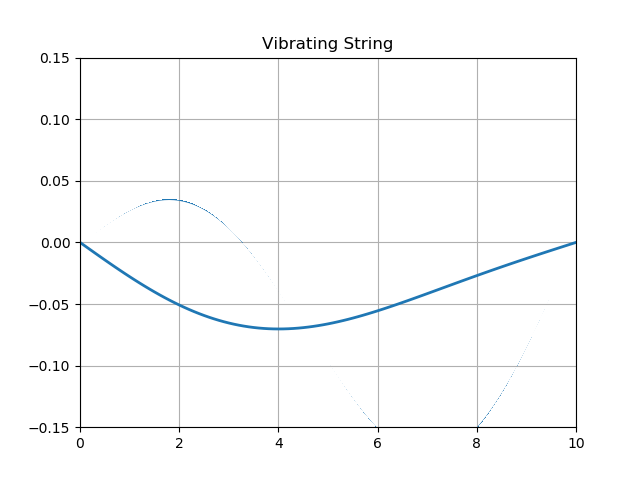

finished


In [50]:
% matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
L = 10.
m = 1.
N = 101
T = 100000.                               
rho = m/L
c = np.sqrt(T/rho)
hx = L/(N-1)
ht = 0.0001
cprime = hx/ht
ratio = pow(c/cprime, 2)
print(c, cprime, ratio)
# Initialization
xi = np.zeros( (N, 3), float)                            
x = np.zeros(N)
k=range(0,N)
for i in k:
    x[i]= i*L/(N-1)

def init():
    for i in range(0,int(N/2)):
        xi[i,0] = 0.1/(N-1)*i
    for i in range(int(N/2)+1,N-1):
        xi[i,0] = xi[int(N/2)-1,0] -0.1/(N-1) * (i-(int(N/2)-1))

    # sin wave initial condition
    for i in range(0,N):
        xi[i,0] = 0.1 * (np.sin(np.pi*i/(N-1)) + 1*np.sin(2*np.pi*i/(N-1)))
        
init()                                     # plot string initial position   
fig=plt.figure()                           # figure to plot (a changing line)
# select axis; 111: only one plot, x,y, scales given
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, L), ylim=(-0.15, 0.15))
ax.grid()                                                       # plot a grid
plt.title("Vibrating String")
line, = ax.plot(k, xi[k,0], lw=2)             # x axis, y values, linewidth=2     

# Get started with first two time steps
for i in range(1, N-1):                                      
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, N-1):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    line.set_data(x,xi[k,2])                           
    for m in range (0,N):                              
        xi[m, 0] = xi[m, 1]                        
        xi[m, 1] = xi[m, 2]
    return line,

ani = animation.FuncAnimation(fig, animate,1,interval=10)           
#plt.show()             
print("finished")

## Arbitrary and Traveling 1-D Waves

Having a discontinuity in the second derivative is not a fatal flaw to the numerical solution.

We can define an initial condition with a discontinuous first derivative (sine function over limited interval) and still have a stable solution if $|G|<1$.

Here we have
* sine function over limited interval
* Gaussian pulse that falls apart into two traveling wave pulses

1000.0 1000.0 1.0


<IPython.core.display.Javascript object>


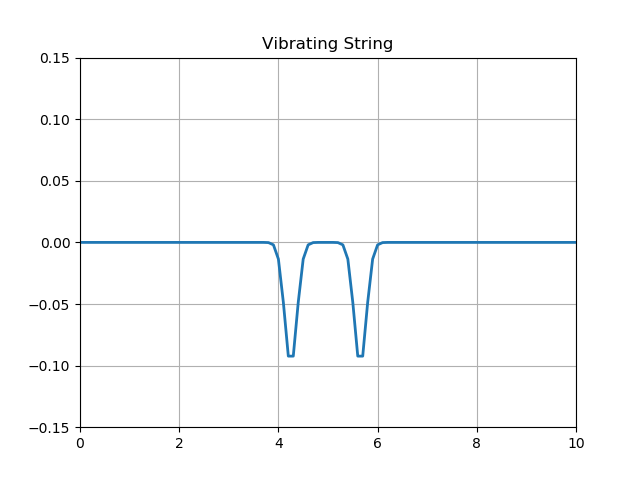

finished


In [51]:
% matplotlib notebook
import numpy as np
import matplotlib.animation as animation

# Parameters
L = 10.
m = 1.
N = 101
T = 100000.                               
rho = m/L
c = np.sqrt(T/rho)
hx = L/(N-1)
ht = 0.0001
cprime = hx/ht
ratio = pow(c/cprime, 2)
print(c, cprime, ratio)
# Initialization
xi = np.zeros( (N, 3), float)                            
x = np.zeros(N)
k=range(0,N)
for i in k:
    x[i]= i*L/(N-1)

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def init():
    for i in range(0,int(N/2)):
        xi[i,0] = 0.1 * (np.sin(2*np.pi*i/(N-1)))
    for i in range(0,N):
        xi[i,0] = 0.2*gaussian(i, N/2, L/8)

init()                                     # plot string initial position   
fig=plt.figure()                           # figure to plot (a changing line)
# select axis; 111: only one plot, x,y, scales given
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, L), ylim=(-0.15, 0.15))
ax.grid()                                                       # plot a grid
plt.title("Vibrating String")
line, = ax.plot(k, xi[k,0], lw=2)             # x axis, y values, linewidth=2     

# Get started with first two time steps
for i in range(1, N-1):                                      
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, N-1):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    line.set_data(x,xi[k,2])                           
    for m in range (0,N):                              
        xi[m, 0] = xi[m, 1]                        
        xi[m, 1] = xi[m, 2]
    return line,

ani = animation.FuncAnimation(fig, animate,1,interval=20)           
plt.show()             
print("finished")

To create a traveling 1-D wave with a certain velocity, we can write the desired wave function:

$$\begin{align}
u(x,t) &= A \sin(kx-\omega t) \\
&= A\sin(x - vt)
\end{align}$$

The initial conditions to set up the wave are:

$$\begin{cases}
u(x,0) &= A \sin(kx) \\
\dot{u}(x,0) &= -v A \cos(kx) \\
\end{cases}$$

Setting up the initial velocity condition is not easy.  Instead of setting the derivative equal to zero, as we did with our original initial step trick, we would need to go back to the equation

$$\frac{\partial y}{\partial t}(x,0) \simeq \frac{y(x, \Delta t)- y(x,
-\Delta t)}{2\Delta t}=0, \ \Rightarrow \ y_{i, 0} = y_{i,2}$$

and rewrite it as 

$$\frac{\partial y}{\partial t}(x,0) \simeq \frac{y(x, \Delta t)- y(x,
-\Delta t)}{2\Delta t}= -v A \cos(kx)$$

where $\omega = v/k$ is set, in this case, by the ratio $T/\rho$ for the string and the value of $k$.
Instead of substituting $y_{i, 0} = y_{i,2}$, we would substitute:

$$y_{i, 0} = 2\Delta t \left[ y_{i,2} + v A \cos(k x_i) \right] $$

With this condition, we would have

$$\begin{align}
y_{i,2} &= 2 y_{i,1}-y_{i,0}+ \frac{v^2 }{C'^{2}} \left [ y_{i+1,1}+y_{i-1,1}-2 y_{i,1}\right] \\
&= 2 y_{i,1}- 2\Delta t \left[ y_{i,2} + v A \cos(k x_i) \right]+ \frac{v^2 }{C'^{2}} \left [ y_{i+1,1}+y_{i-1,1}-2 y_{i,1}\right]\\
(1+2\Delta t) y_{i,2} &= 2 y_{i,1} + \frac{v^2 }{C'^{2}} \left [ y_{i+1,1}+y_{i-1,1}-2 y_{i,1}\right] - 2v A\Delta t \cos(k x_i)\\
y_{i,2} &= (1+2\Delta t)^{-1} \left\{ 2y_{i,1} + \frac{v^2 }{C'^{2}} \left [ y_{i+1,1}+y_{i-1,1}-2 y_{i,1}\right] - 2v A\Delta t \cos(k x_i) \right\}\\
\end{align}$$

# Dispersion in 1-D Waves

We assumed in our derivations that the velocity was independent of $k$ and $\omega$.
If instead we have a $v(k)$ that is not constant, then the Fourier modes of the initial pulse will propagate at different velocities, and the wave will disperse.

The practical example for a dispersive medium is one that includes a **frictional force**.

Consider again the element of a string between $x$ and
$x + dx$, but now imagine that this element is moving
in a viscous fluid such as air. An approximate model for the frictional
force has it pointing in a direction opposite the vertical velocity of
the string and proportional to that velocity, as well as proportional to
the length of the string element:

$$F_\text{friction} \simeq -2\kappa\ \Delta x\ \frac{\partial y} {\partial t},$$

where $\kappa$ is a constant that is proportional to the viscosity of the medium
in which the string is vibrating. Including this force in the equation of motion
changes the wave equation to 

$$\frac{\partial^2y}{\partial t^2}= C^2  \frac{\partial^2
y}{\partial x^2} - \frac{2\kappa}{\rho} \frac{\partial y}{\partial t}$$

Do you see how to include this in the code?  How does that $F_\text{friction}$ term change our basic explicit form of the difference equation?

Reminder: with the simple wave equation ($\kappa=0$), we had:
$$
y_{i,j+1}  = 2 y_{i,j}-y_{i,j-1}+ \frac{v^2 }
{C'^{2}} \left [ y_{i+1,j}+y_{i-1,j}-2 y_{i,j}\right], \quad C'
\equiv \frac {\Delta x}{\Delta t}$$

Now we include the first-order time derivative (as a central-difference approximation):

$$\frac{y_{i,j+1} - 2 y_{i,j} + y_{i,j-1}}{(\Delta t)^2} = C^2 \frac{y_{i+1,j} - 2 y_{i,j} + y_{i-1,j}}{(\Delta x)^2} - \frac{2\kappa}{\rho} \frac{y_{i,j+1} - y_{i,j-1}}{2\Delta t}$$

As always, we try to rearrange the difference equation into an *explicit* form:

$$\begin{align}
y_{i,j+1} \left( \frac{1}{(\Delta t)^2} + \frac{\kappa}{\rho \Delta t} \right) &= \frac{2 y_{i,j} - y_{i,j-1}}{(\Delta t)^2} + C^2 \frac{y_{i+1,j} - 2 y_{i,j} + y_{i-1,j}}{(\Delta x)^2} - \frac{\kappa}{\rho} \frac{y_{i,j-1}}{\Delta t} \\
y_{i,j+1} &= \left( \frac{1}{(\Delta t)^2} + \frac{\kappa}{\rho \Delta t} \right)^{-1} \left[ \frac{2 y_{i,j} - y_{i,j-1}}{(\Delta t)^2} + C^2 \frac{y_{i+1,j} - 2 y_{i,j} + y_{i-1,j}}{(\Delta x)^2} - \frac{\kappa}{\rho} \frac{y_{i,j-1}}{\Delta t} \right]
\end{align}$$

# Waves in 2 Dimensions

Now let us focus on the wave equation in 2 dimensions.  The physical example is a thin membrane, the 2-D analogue of the 1-D string.

The description of wave motion on a membrane is basically the same as
that of 1-D waves on a string, only now we have wave
propagation in two directions.
The vertical motion of a small piece of the membrane (in $z$) arises from a difference in the net vertical force from the edges of the small piece.
We assume that the mass of the little piece is $m=\rho \Delta x \Delta y$.

<img src="Figures/Figure_21.6.png" width="50%">

In the figure, $\sum F_z(x)  \ =\  T\Delta x \sin\theta - T \Delta x  \sin \phi$

As we did for the 1-D string, we might assume that 

$$\sin \theta   \approx\  \tan  \theta    =  \left.\frac{\partial u}{ \partial y}\right|_{y+\Delta y},\quad \text{and}\quad
      \sin \phi   \approx\  \tan \phi
   =  \left.\frac{\partial u}{ \partial y}\right|_{y}$$

Then, for a fixed $x$ value, we can write the dependence on $y$:

$$\sum F_z (x_\text{fixed}) =  T\Delta x \left(
  \frac{\partial u}{ \partial y}\Bigr |_{y+\Delta y}-
  \frac{\partial u}{ \partial y}\Bigr |_{y} \right)
\ \approx\   T\Delta x  \frac{\partial^2 u}{\partial y^2} \Delta y$$

Similarly, the net force in the $z$ direction as a result of the
variation in $y$ is:

$$ \sum F_z (y_\text{fixed})
  \ =\  T\Delta y \left(  \left.\frac{\partial u}{ \partial x}\right|_{x+\Delta x}-
 \left.\frac{\partial u}{ \partial x}\right|_{x} \right)
   \ \approx\   T\Delta y  \frac{\partial^2 u}{\partial x^2} \Delta x$$
   
It's convenient that we have $\Delta x \Delta y$ in both terms.

We can now apply Newton’s second law to find the equation of motion:
$$\begin{align}
\rho\Delta x\Delta y \frac{\partial^2 u}{\partial t^2} & = T \Delta x  \frac{\partial^2 u}{\partial y^2}
\Delta y+ T\Delta y  \frac{\partial^2 u}{\partial x^2} \Delta x, \\
\Rightarrow\hspace{6ex} \frac{1}{ v^2} \frac{\partial ^2u}{ \partial t^2}  \ & =\
  \frac {\partial ^2 u }{ \partial x^2} +  \frac{\partial ^2 u }{ \partial y^2}
\end{align}$$

In this 2-D case, the velocity $v$ is still $v=\sqrt{T/\rho}$.  (It could not change because dimensional analysis requires it to have units of [length]/[time].)

But wait!  For the 2-D case, $\rho$ is an area mass density: [mass]/[area], not [mass]/[length].
So the units do not work out after all!

Check the units again in the equation...

The only way it works is if the tension $T$ is really "tension per unit length."

This is indeed how it was written in the force equation: $F=T\Delta x$.

## Numerical Solution for 2-D Wave Equation

The numerical solution for the 2-D wave equation uses the finite-difference approximations in the same way as for the 2-D wave equation.

$$\begin{align}
\frac{\partial^2 u(x,y,t)}{ \partial t^2} &\ =\  \frac{u(x,y,t+\Delta t) +
u(x,y,t-\Delta t) -2u(x,y,t) }{ (\Delta t)^2} \\
\frac{\partial^2 u(x,y,t)}{ \partial x^2} &\ =\
\frac{u(x+\Delta x,y,t) + u(x-\Delta x,y,t) -2u(x,y,t) }{ (\Delta x)^2}\\
\frac{\partial^2 u(x,y,t)}{ \partial y^2} &\ =\ \frac{u(x,y+\Delta y,t) +
u(x,y-\Delta y,t) -2u(x,y,t) }{ (\Delta y)^2}
\end{align}$$

These are then substituted into the 2-D wave equation to obtain an explicit solution for time-stepping.

(Note that the time index $k$ is in superscript, while position indices $i,j$ are in subscript.)

$$
u^{k+1}_{i,j} =   2u^k_{i,j}-u^{k-1}_{i,j}+   \frac{v^2}{c'^2} \left[u^{k}_{i+1,j}
 +  u^{k}_{i-1,j}
    -4u^k_{i,j}
+  {u^{k}_{i,j+1} + u^{k}_{i,j-1}  } \right]
$$

This is the line we will put in the code to update the $z$ value for each point on the discrete grid.

### Initial Conditions

To use the explicit equation for the first few time steps, we need some values for the positions at $k=0$ (or $k=-1$, depending on how you count).  This corresponds to $t=-\Delta t$.

If the membrane is assumed to start from rest ($\partial u/\partial t = 0$), then we can use the same trick as for the 1-D case:

$$\begin{align}
\frac{\partial u (t=0)}{\partial t} &= 0 \\
\frac{u^1_{i,j}-u^{-1}_{i,j}} { 2\Delta t} &= 0 \\
u^{-1}_{i,j} &=u^1_{i,j}
\end{align}$$

With this substitution we can write:

$$u^1_{i,j} = u^0_{i,j}+ \frac{c^2}{ 2 c'^2} \left[u^{0}_{i+1,j}
 +  u^{0}_{i-1,j}
   -4u^0_{i,j}
+  {u^{0}_{i,j+1} + u^{0}_{i,j-1}  } \right]$$

and after that we can adjust the $k$ index, since we are no longer using the value at $t=-\Delta t$ for anything.

### Implementation 

In the following example, we see the results for the 2-D wave on the membrane.
With correct choice of initial conditions, we can see the following modes:
* $(nx, ny) = (1,1)$ mode
* (2,1) mode
* (1,2) mode
* (2,2) mode


<IPython.core.display.Javascript object>


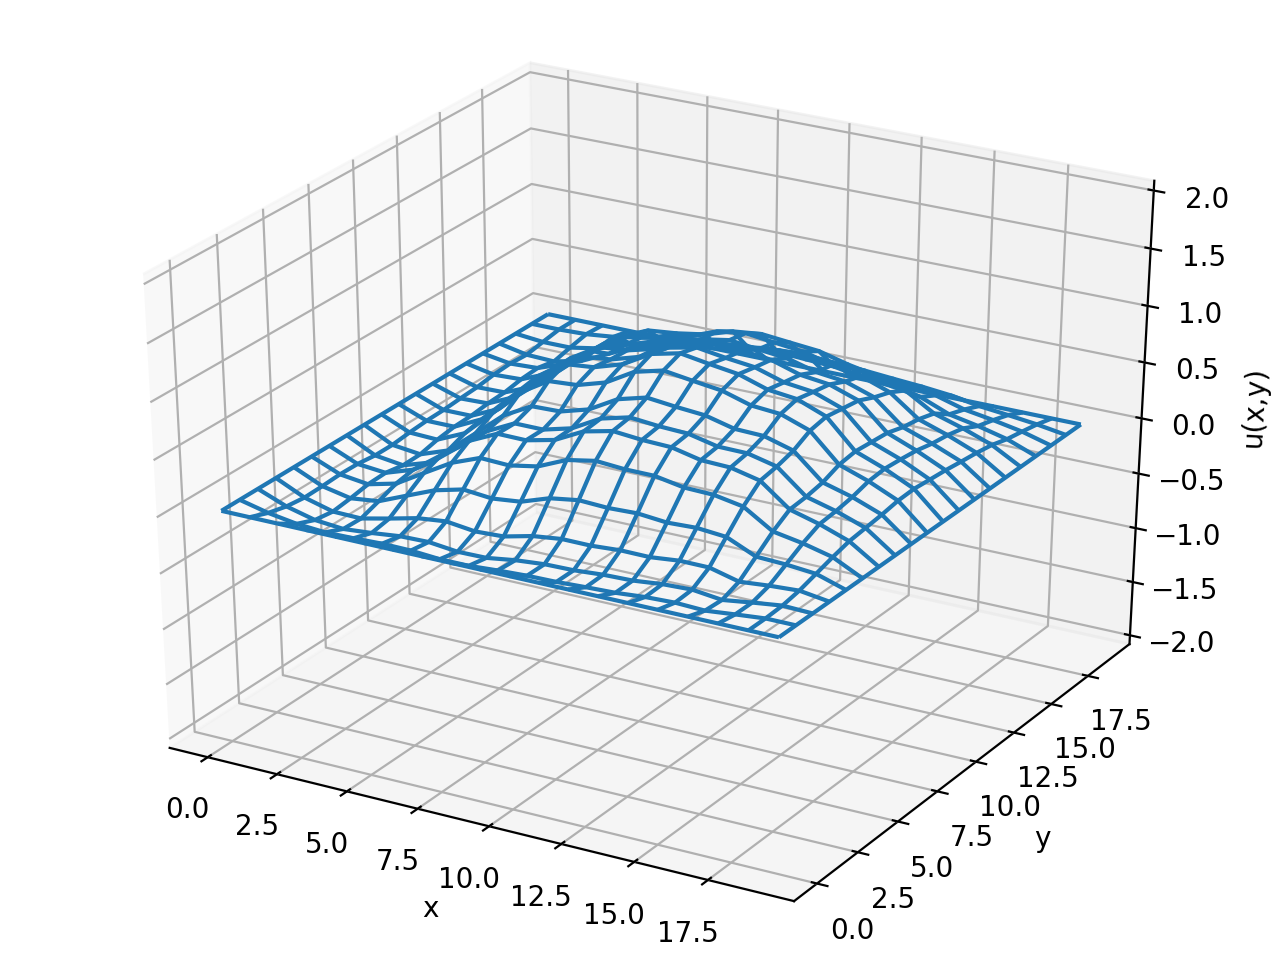

In [47]:
%matplotlib notebook
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation
    Solve Helmholtz equation for rectangular vibrating membrane
    Initial conditions: u(x,y,t=0)=0 at borders, du/dt(x,y,t=0)=0                       
    Tension (ten)= 180 N/m^2, density (den)= 390.0 kg/m^2 (rubber)"""
     
# Waves2D.py:  Solve Helmholtz equation for rectangular vibrating membrane 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
                                  
N = 20              
c = np.sqrt(180./390)                     # Speed = sqrt(ten[]/den[kg/m2;])
u = np.zeros((N,N,N))
v = np.zeros((N,N)) 
vinit = np.zeros((N,N))
incrx = np.pi/N
incry = np.pi/N                         
cprime = c                                                     
covercp = c/cprime
ratio = 0.5*covercp*covercp  # c/c' 0.5 for stable

y = 0.0              
for j in range(0,N):                                 # Initial position
    x = 0.0
    for i in range(0,N):
        u[i][j][0] = 3*np.sin(1.0*x)*np.sin(1.0*y)                  # Initial shape
        v[i][j] = u[i][j][0]
        x += incrx
    y += incry
    
for j in range(1,N-1):                              # First time step
    for i in range(1,N-1):
        u[i][j][1] = u[i][j][0] + 0.5*ratio*(u[i+1][j][0]+u[i-1][j][0] 
                                             + u[i][j+1][0]+u[i][j-1][0]-4.*u[i][j][0])  

x1 = range(0, N)
y1 = range(0, N)
X, Y = np.meshgrid(x1,y1)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim(-2.0, 2.0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')  

def init():
    animate.wframe = ax.plot_wireframe(X, Y, v)
    return animate.wframe

def animate(i):
    ax.collections.remove(animate.wframe)
    for j in range(1,N-1): 
        for i in range(1,N-1):
            u[i][j][2] = 2.*u[i][j][1] - u[i][j][0] + ratio*(u[i+1][j][1] + 
                                                             u[i-1][j][1] +u[i][j+1][1]+u[i][j-1][1] - 4.*u[i][j][1])

    for j in range(1,N-1): 
        for i in range(1,N-1):
            u[i][j][0] = u[i][j][1]                       # Reset past  
            u[i][j][1] = u[i][j][2]                       # Reset present

    for j in range(0,N):     
        for i in range(0,N):
            v[i][j] = u[i][j][2]           # Convert to 2D for matplotlib

    animate.wframe = ax.plot_wireframe(X, Y, v)
    return animate.wframe

ani = animation.FuncAnimation(fig, animate, np.arange(1000), interval=10, blit=True, init_func=init)

# Further Exploration

There are many good wave equation examples on this [Acoustics Demonstration Page by Prof. Dan Russell](http://www.acs.psu.edu/drussell/demos.html).

I would like to highlight a few special topics:
* [Difference between wave propagation on string and membrane](http://www.acs.psu.edu/drussell/Demos/Membrane-vs-String/Membrane-vs-String.html)
* [Solitons](http://www.acs.psu.edu/drussell/Demos/Solitons/solitons.html) (see also Chapter 24.5 in Landau)
* [Vibrational Behavior of an Empty Beer Bottle](http://www.acs.psu.edu/drussell/Demos/BeerBottle/beerbottle.html)